import kaggle party member

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

For each id in the test set, you must predict the value for the target MedHouseVal.

In [7]:
data = pd.read_csv("./train.csv")

In [8]:
print(data)

          id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0          0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989   
1          1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084   
2          2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602   
3          3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286   
4          4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790   
...      ...     ...       ...       ...        ...         ...       ...   
37132  37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222   
37133  37133  3.7308      26.0  5.087533   0.966019      1006.0  4.316901   
37134  37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734   
37135  37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659   
37136  37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065   

       Latitude  Longitude  MedHouseVal  
0         34.60    -120.12       

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB
None


<AxesSubplot:>

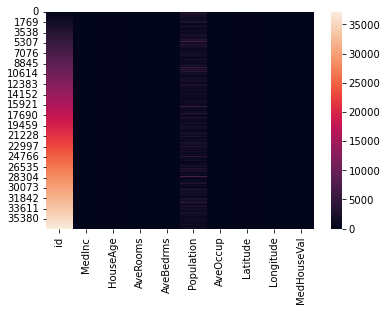

In [10]:
sns.heatmap(data)